# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11490434/11490434 [==============================] - 0s 0us/step


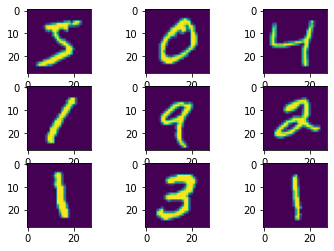

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [5]:
# TODO: Build your model
X_train_full = X_train_full/255.0
X_test = X_test/255.0


y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

np.random.seed(2) 
indices_shuffle = np.random.permutation(X_train_full.shape[0])
X_validation, X_train = X_train_full[indices_shuffle[:5000]], X_train_full[indices_shuffle[5000:]]
y_validation, y_train = y_train_full[indices_shuffle[:5000]], y_train_full[indices_shuffle[5000:]]

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=30, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
1834/1834 [==============================] - 18s 9ms/step - loss: 0.3661 - accuracy: 0.8855 - val_loss: 0.1517 - val_accuracy: 0.9526
Epoch 2/20
1834/1834 [==============================] - 16s 9ms/step - loss: 0.2153 - accuracy: 0.9345 - val_loss: 0.1094 - val_accuracy: 0.9666
Epoch 3/20
1834/1834 [==============================] - 16s 9ms/step - loss: 0.1685 - accuracy: 0.9465 - val_loss: 0.1025 - val_accuracy: 0.9700
Epoch 4/20
1834/1834 [==============================] - 16s 9ms/step - loss: 0.1492 - accuracy: 0.9542 - val_loss: 0.0880 - val_accuracy: 0.9748
Epoch 5/20
1834/1834 [==============================] - 17s 9ms/step - loss: 0.1344 - accuracy: 0.9574 - val_loss: 0.0889 - val_accuracy: 0.9724
Epoch 6/20
1834/1834 [==============================] - 17s 9ms/step - loss: 0.1198 - accuracy: 0.9622 - val_loss: 0.0737 - val_accuracy: 0.9776
Epoch 7/20
1834/1834 [==============================] - 17s 9ms/step - loss: 0.1105 - accuracy: 0.9645 - val_loss: 0.0672 - val_ac

In [6]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 300)               0

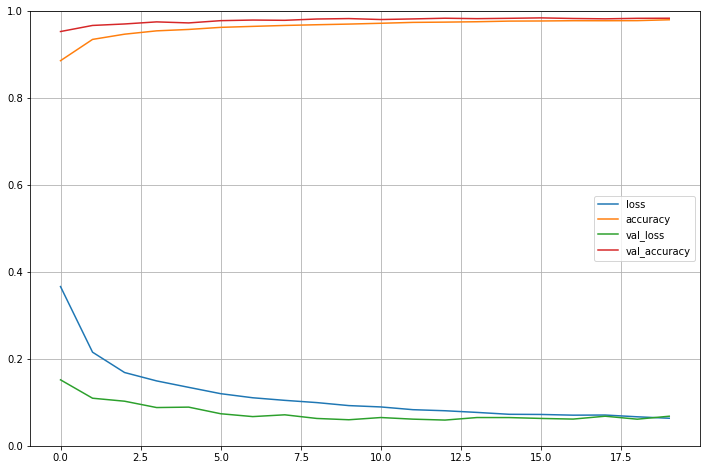

In [7]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [8]:
model.save('FDS22-M063-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [10]:
model = keras.models.load_model("FDS22-M063-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9819


[0.06836476922035217, 0.9818999767303467]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 


The model was designed with an input layer based on the shape of the data, 28x28. After testing various numbers of hidden layers, we chose to use three layers with 300 nodes in the first layer and 200 nodes in the remaining two. The output layer has 10 nodes, corresponding to the expected output dimensions (0-9). To optimize performance, we applied batch normalization and used the ADAM optimization algorithm with a learning rate of 0.001. The activation function chosen was the exponential linear unit (elu). Dropout layers with a dropout rate of 0.2 were also implemented to prevent overfitting. The resulting model achieved an accuracy of 97.96% on the training data, 98.32% on the validation data, and 98.19% on the test data. Hyperparameter optimization, such as determining the appropriate batch size and number of epochs, was a time-intensive process. Which required a lot of time.